***Tarea 3***

En este documento mostraremos como crear graficos a partir de un archivo .csv con Jupyter Notebook.

Para comenzar importaremos las librerías necesarias.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt


El set de datos fue obtenido de  https://archive.ics.uci.edu/ml/datasets/wine+quality

In [2]:
df = pd.read_csv('winequality(limpio).csv')

Realizaremos un analisis de los datos relaciondaso a los vinos tintos, por ende, primero creamos un data frame donde se guarde todos los datos solamente de los vinos tintos.(df_red)

In [3]:
#Para este analisis trabajaremos con los vinos tintos
df_red = df[df['Red']==1]
df_red=df_red.drop(columns=['White'])
df_red['density-kg/m^3']=df_red['density-kg/m^3']/1000
df_red.rename(columns={'density-kg/m^3':'density'}, inplace=True)
df_red

#Remplazamos la calsificacion de la calidad 3 y 4(mala) 5 y 6(media) 7 y 8(Alta)
categor_cond=[ (df_red['quality']>=7),
               (df_red['quality']<=4)]
rating=['Alta','Baja']
df_red['quality classification'] = np.select(categor_cond,rating,default='Media')
df_red




,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,density,quality classification,Red
0,7.4,0.700,0.00,1.9,0.076,11.0,0.064516,3.51,0.56,9.4,5,0.99780,Media,1
1,7.8,0.880,0.00,2.6,0.098,25.0,0.140553,3.20,0.68,9.8,5,0.99680,Media,1
2,7.8,0.760,0.04,2.3,0.092,15.0,0.110599,3.26,0.65,9.8,5,0.99700,Media,1
3,11.2,0.280,0.56,1.9,0.075,17.0,0.124424,3.16,0.58,9.8,6,0.99800,Media,1
4,7.4,0.700,0.00,1.9,0.076,11.0,0.064516,3.51,0.56,9.4,5,0.99780,Media,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,0.087558,3.45,0.58,10.5,5,0.99490,Media,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,0.103687,3.52,0.76,11.2,6,0.99512,Media,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,0.078341,3.42,0.75,11.0,6,0.99574,Media,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,0.087558,3.57,0.71,10.2,5,0.99547,Media,1


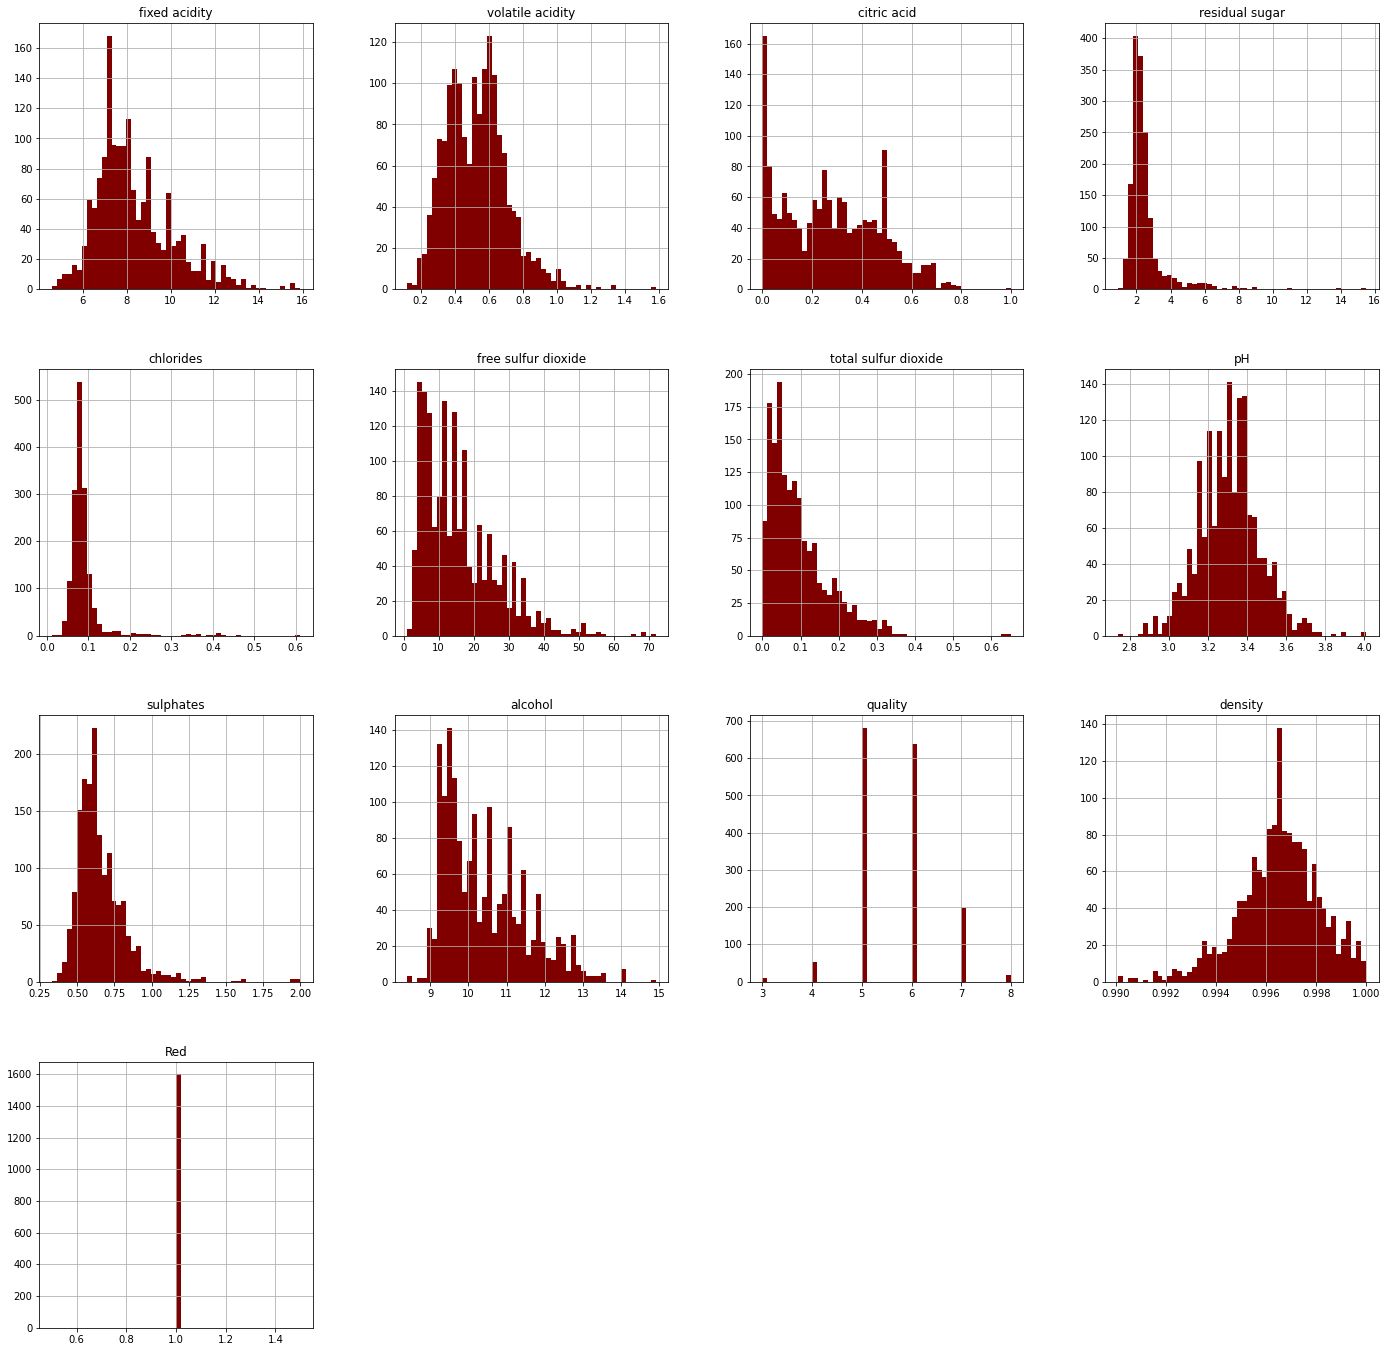

In [12]:
df_red.hist(figsize=(24,24), color='maroon', bins=50)
plt.savefig('Graficos/graficos_agrupados_barra.png', transparent=False)
plt.show()

Algunas conclusiones de las gráficas de histagrama:

1.  La mayoría de los grados de alcohol están entre 9 y 10%
2.  En la  densidad y el PH, si bien vemos una curva en forma de campana, pero sin una prueba de normalidad correcta, es difícil    determinar si los datos poseen una distribución normal.

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


Text(0.5, 1.0, 'Distribucion de la variable Calidad')

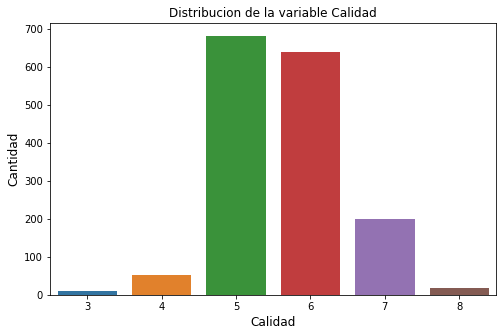

In [13]:
print(df_red['quality'].value_counts())
plt.figure(figsize = (8, 5))
sns.countplot(x = df_red['quality'])
plt.xlabel('Calidad', size = 12)
plt.ylabel("Cantidad", size = 12)
plt.savefig('Graficos/Distribucion_calidad.png', transparent=False)
plt.title("Distribucion de la variable Calidad", size = 12)

Los vinos podian ser clasificados con un valor de 0 a 10, segun los enologos los vinos de calidad mayor o igual a 7 pueden ser categorizados como buenos vinos.

 Podemos ver que la mayoria de los vinos se concentran en la calidad de 5 y 6.

Anteriormente clasificamos los vinos segun su calidad en 3 tipos de categorias malo,medio,alto, los cuales vizualizaremos en un grafico de torta.

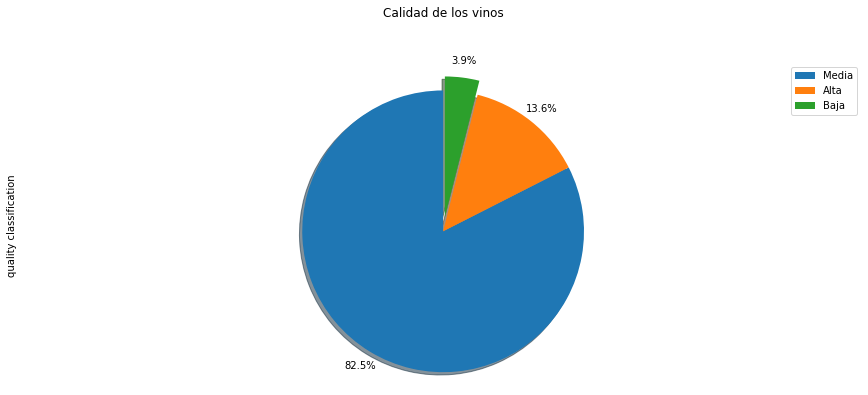

Media    1319
Alta      217
Baja       63
Name: quality classification, dtype: int64

In [14]:
lista_explotar = [0, 0, 0.1] # relación para cada continente del inclinado de cada porción.
df_red['quality classification'].value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,           # desactiva las etiquetas en el gráfico
                            pctdistance=1.12,      # relación entre el centro de cada sector circular y el inicio del texto generado por autopct 
                            explode=lista_explotar
                            )

plt.title('Calidad de los vinos', y=1.12) 
plt.axis('equal')
plt.legend(('Media', 'Alta', 'Baja'))
plt.savefig('Graficos/grafico_pie.png', transparent=False)
plt.show()
df_red['quality classification'].value_counts()


Podemos observar que los datos muestrados se concentran pricnipalemnte en al categoria de Calidad Media con un 82,5%, en la calidad baja un 13,6% y en la Calidad alta encontramos un 3,9% que represa a 217 vinos calificados por los enologos.



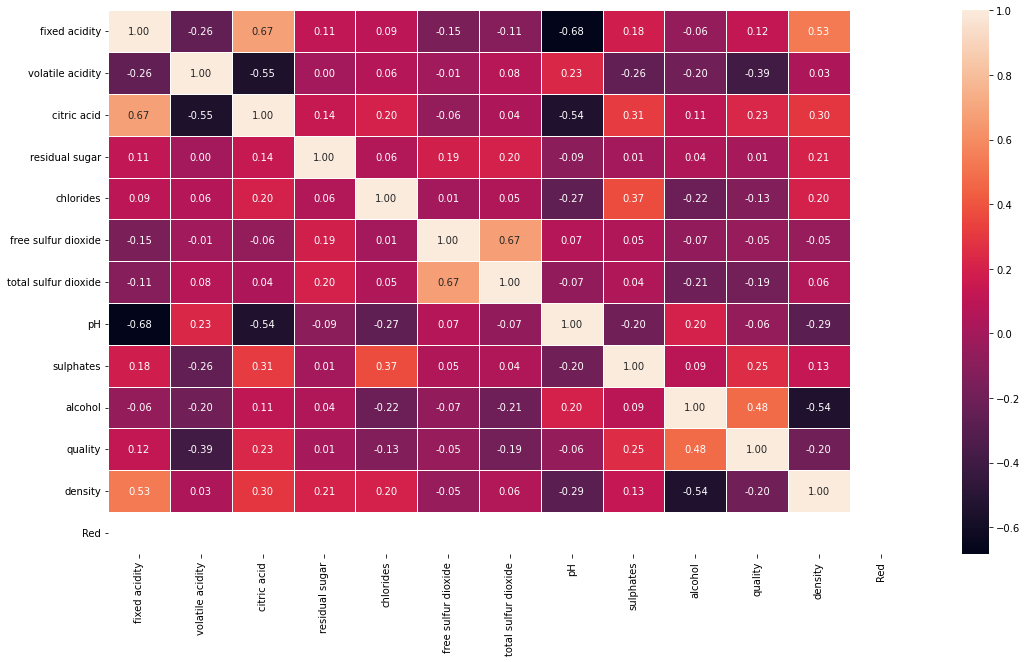

quality                 1.000000
alcohol                 0.475297
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
total sulfur dioxide   -0.185100
density                -0.197448
volatile acidity       -0.390558
Red                          NaN
Name: quality, dtype: float64

In [15]:
plt.figure(figsize = (18,10))
sns.heatmap(df_red.corr(),annot=True,fmt='.2f',linewidths =1)
plt.savefig('Graficos/grafico_calor.png', transparent=False)
plt.show()

correlacion = df_red.corr()
correlacion['quality'].sort_values(ascending=False)

Correlación positiva: si la primera cantidad aumenta, la segunda cantidad también aumenta.
Correlación negativa: si la primera cantidad aumenta,  la segunda disminuye y viceversa.
Si la correlación es cero, significa que no hay correlación entre las cantidades (no depende entre sí)


Con relacion al mapa de calor podemos inferir que:

    1- Podemos ver que el nivel de alcohol tiene la correlación positiva más fuerte (0.48) con la de calidad del vino.
    2- Ademas los sulfatos y el ácido cítrico  podriamos decir que tiene una correlacion positiva debil con la calidad del vino
    3- El ácido cítrico(0.67) y la densidad(0.53) tienen una fuerte correlación positiva con la acidez fija.
    4- El pH tiene una correlación negativacon la densidad, la acidez fija, el ácido cítrico y los sulfatos, es decir se correlacionan en sentido inverso.A valores altos de una de ellas le suelen corresponder valor bajos de la otra y viceversa.Cuánto más próximo a -1 esté el coeficiente de correlación más será esta covariación entre las variables.

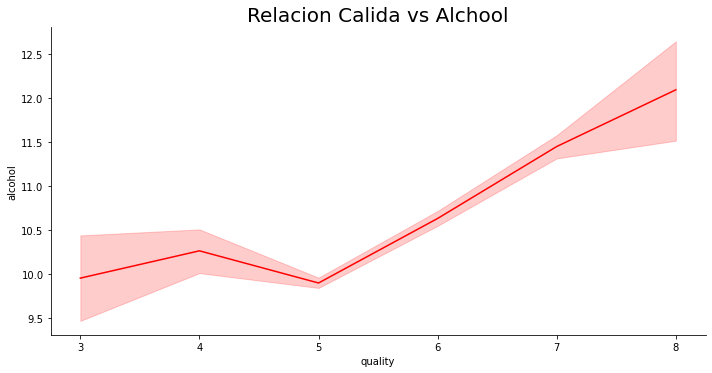

In [16]:
sns.relplot(data=df_red, x='quality', y='alcohol', kind='line', height=5, aspect=2, color='red')
plt.title("Relacion Calida vs Alchool", size = 20)
plt.savefig('Graficos/graficos_calidad_alcohol.png', transparent=False)


Podemos confirmar visualmente aquí la correlación positiva vista anteriormente en el mapa de calor entre el nivel de 'alcohol' y el puntaje asignado a la calidad del vino.

C:\Users\56981\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\56981\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


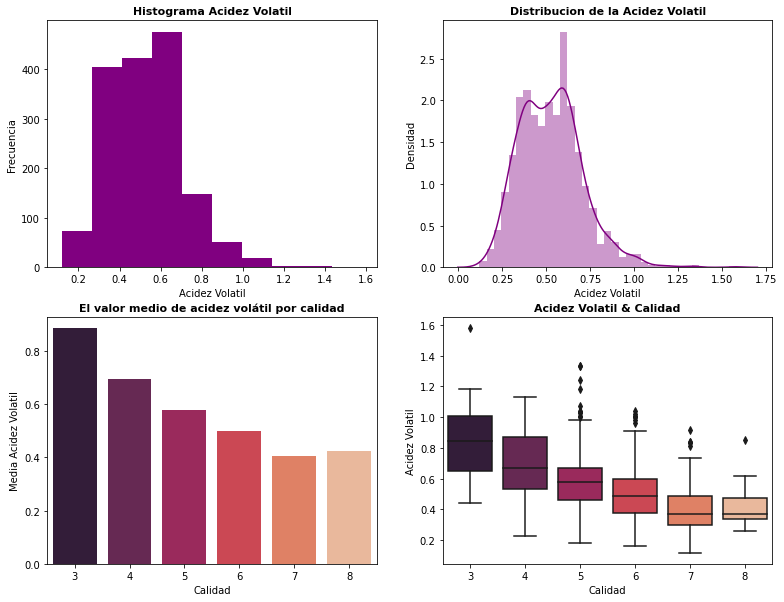

In [17]:
acidezvolatilprom = []

for each in df_red["quality"]:
    x = df_red[df_red["quality"] == each]
    prom = x["volatile acidity"].mean()
    acidezvolatilprom.append(prom)


plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.hist(df_red["volatile acidity"], color="purple")
plt.xlabel("Acidez Volatil")
plt.ylabel("Frecuencia")
plt.title("Histograma Acidez Volatil", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,2)
sns.distplot(df_red["volatile acidity"],color="purple").set(xlabel='Acidez Volatil', ylabel='Densidad')
plt.title("Distribucion de la Acidez Volatil", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,3)
sns.barplot(x = df_red["quality"], y = acidezvolatilprom, palette= "rocket")
plt.title("El valor medio de acidez volátil por calidad", color = "black", fontweight= 'bold', fontsize = 11)
plt.xlabel("Calidad")
plt.ylabel("Media Acidez Volatil")
plt.subplot(2,2,4)
sns.boxplot(df_red['quality'], df_red["volatile acidity"], palette='rocket').set(xlabel='Calidad', ylabel='Acidez Volatil')

plt.title("Acidez Volatil & Calidad", color = "black", fontweight= 'bold', fontsize = 11)
plt.savefig('Graficos/graficos_agrupados.png', transparent=False)
plt.show()


La disminución de la acidez volátil parece afectar positivamente a la calidad del vino.

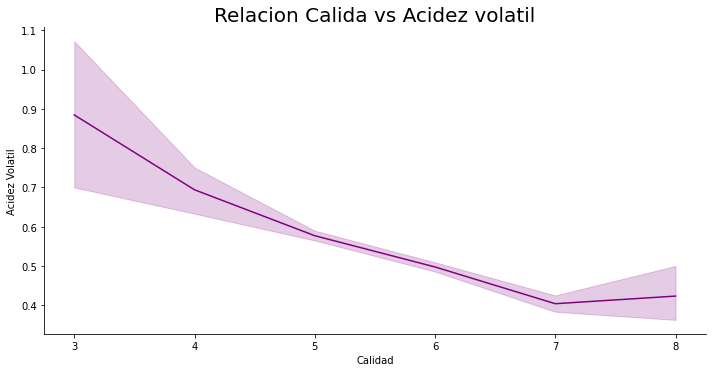

In [18]:

a=sns.relplot(data=df_red, x='quality', y='volatile acidity', kind='line', height=5, aspect=2, color='purple')
a.set(xlabel='Calidad', ylabel='Acidez Volatil')
plt.title("Relacion Calida vs Acidez volatil", size = 20)
plt.savefig('Graficos/grafico_calidad_acidez_volatil.png', transparent=False)


En este grafico podemos valdiar el analisis obtenido anteriormente sobre la acidez volatil la cual al disminuir afecta positivamente la validad del vino

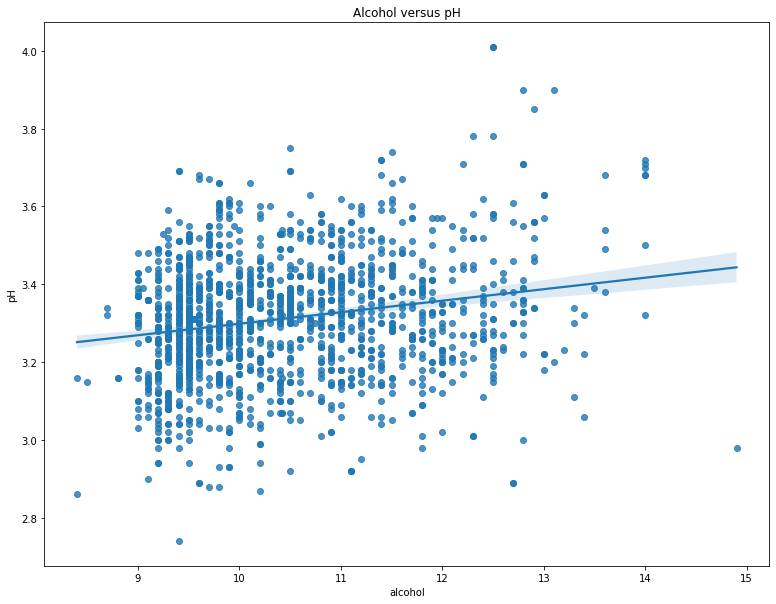

In [19]:
plt.figure(figsize=(13,10))
plt.title("Alcohol versus pH", size = 12)
sns.regplot(x='alcohol',y='pH',data=df_red)
plt.savefig('Graficos/grafico_alcohol_pH.png', transparent=False)


Esta figura muestra que el alcohol tiene una relación débilmente positiva con los valores de pH. Además, la línea de regresión se representa en la figura, ilustrando la correlación entre ellos.


En conclusion es dificil reudcir la calidad del vino a sus variables, pero existe una tendencia en los datos que a mayor alchool y menor acidez podemos encontrar mejores vinos. 